# Decision trees

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../Data/Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

<Axes: xlabel='Years', ylabel='Hits'>

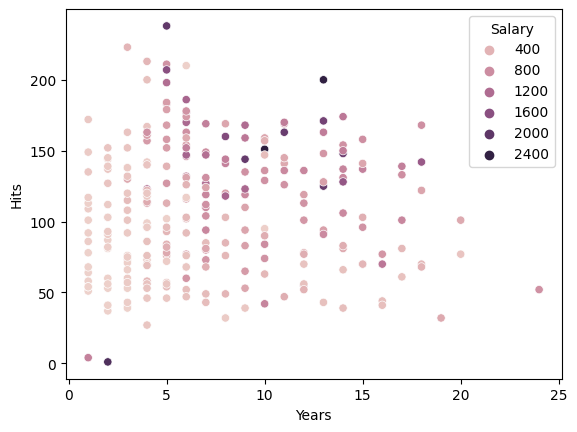

In [9]:
sns.scatterplot(data = df, x = "Years", y = "Hits", hue = "Salary")

## more EDA - for reader

## Decision tree for regression

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

model = DecisionTreeRegressor(max_depth=2)

X, y = df[["Years", "Hits"]], df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((176, 2), (87, 2), (176,), (87,))

In [31]:
model.fit(X_train, y_train)
model.feature_importances_

array([0.61066185, 0.38933815])

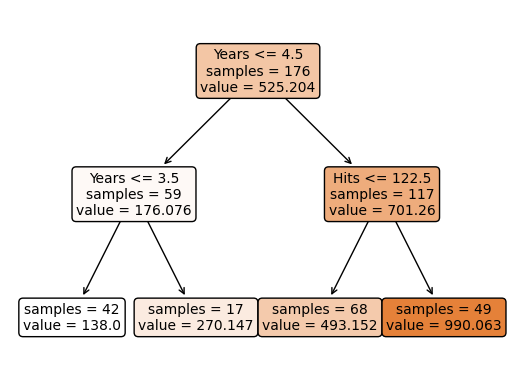

In [32]:
from sklearn import tree

# fig = plt.figure(figsize = (16,10))
tree.plot_tree(model, filled = True, feature_names=X_train.columns, impurity=False, rounded=True);

In [35]:
print(tree.export_text(model, feature_names = list(X_train.columns)))
# TODO: parse this text and extract predictors and respective thresholds

|--- Years <= 4.50
|   |--- Years <= 3.50
|   |   |--- value: [138.00]
|   |--- Years >  3.50
|   |   |--- value: [270.15]
|--- Years >  4.50
|   |--- Hits <= 122.50
|   |   |--- value: [493.15]
|   |--- Hits >  122.50
|   |   |--- value: [990.06]



### Evaluate on test data

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
MAE, RMSE = mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

MAE, RMSE

(272.8757953250266, 429.55493340990563)

In [40]:
percentage_RMSE = RMSE / np.mean(y_test)
percentage_RMSE # not good -> use all features, do eda, remove features, feature engineering

0.7703416775431214

## Decision tree for classification

In [54]:
df = pd.read_csv("../Data/Default.csv")

# note Decision tree in sklearn can't handle categorical variables directly, must dummy encode
df = pd.get_dummies(df, drop_first=True)
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [55]:
X, y = df.drop("default_Yes", axis = "columns"), df["default_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 3), (2000, 3), (8000,), (2000,))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1931
           1       0.37      0.33      0.35        69

    accuracy                           0.96      2000
   macro avg       0.67      0.66      0.66      2000
weighted avg       0.96      0.96      0.96      2000



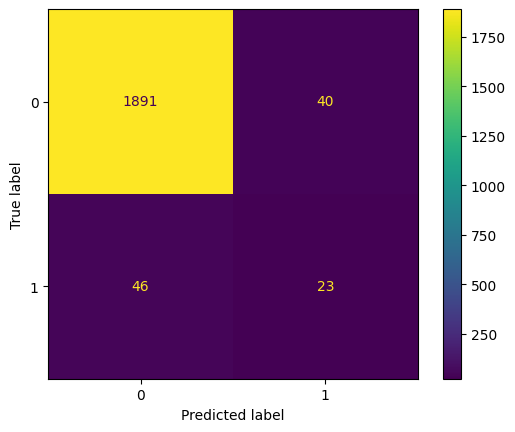

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()